In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [6]:
path = Path('/home/ubuntu/food-101')
path

PosixPath('/home/ubuntu/food-101')

In [7]:
data = ImageDataBunch.from_csv(path, folder='images', csv_labels='train.csv', fn_col=0, label_col=1, 
                               suffix='.jpg', size=224, bs=bs, ds_tfms=get_transforms(), test='test')

In [8]:
print(len(data.train_ds))
print(len(data.valid_ds))
print(len(data.test_ds))

60600

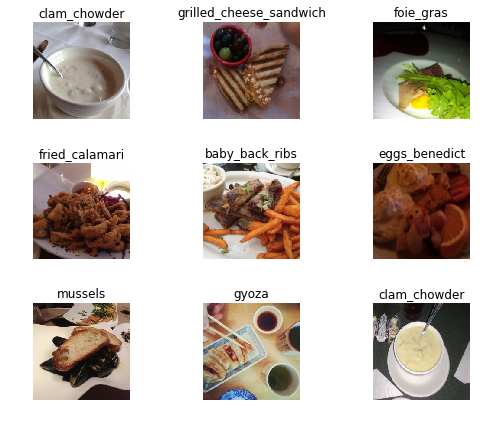

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
print(data.classes)
len(data.classes),data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

(101, 101)

In [15]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ubuntu/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 112860582.03it/s]


In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.214398,1.807610,0.461219
2,1.899746,1.522950,0.392171
3,1.657138,1.370545,0.354875
4,1.541147,1.341189,0.347284


In [17]:
learn.save(' v1_stage1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

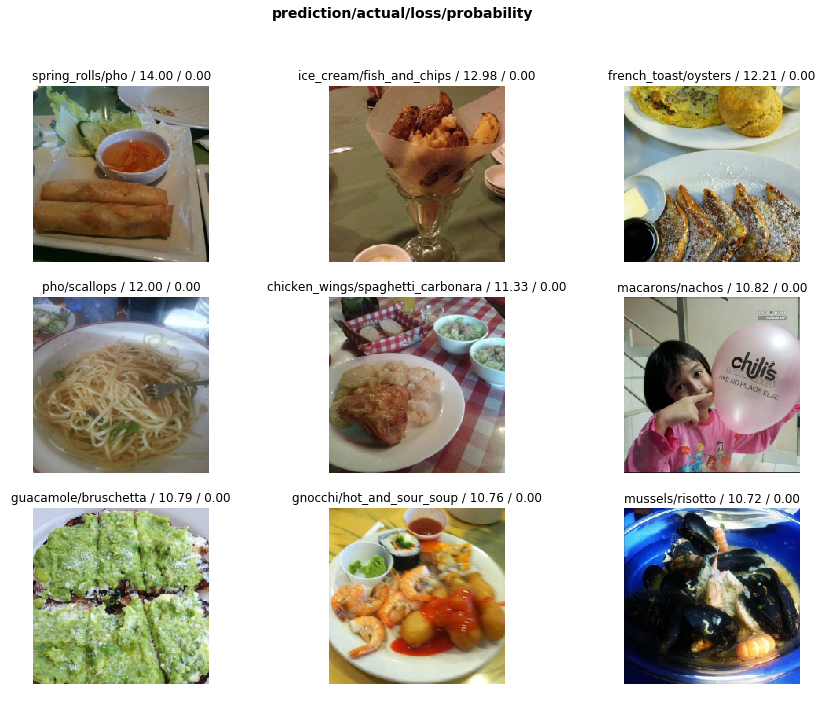

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
interp.most_confused(min_val=10)

[('chocolate_mousse', 'chocolate_cake', 22),
 ('cheesecake', 'panna_cotta', 20),
 ('pulled_pork_sandwich', 'hamburger', 19),
 ('tuna_tartare', 'beef_tartare', 19),
 ('chocolate_cake', 'chocolate_mousse', 15),
 ('chocolate_mousse', 'panna_cotta', 15),
 ('filet_mignon', 'steak', 15),
 ('paella', 'fried_rice', 15),
 ('apple_pie', 'bread_pudding', 14),
 ('donuts', 'beignets', 14),
 ('filet_mignon', 'pork_chop', 14),
 ('grilled_salmon', 'pork_chop', 14),
 ('pork_chop', 'filet_mignon', 14),
 ('steak', 'filet_mignon', 14),
 ('dumplings', 'gyoza', 13),
 ('steak', 'baby_back_ribs', 13),
 ('steak', 'pork_chop', 13),
 ('steak', 'prime_rib', 13),
 ('beef_tartare', 'tuna_tartare', 12),
 ('clam_chowder', 'lobster_bisque', 12),
 ('foie_gras', 'pork_chop', 12),
 ('lobster_bisque', 'clam_chowder', 12),
 ('cheesecake', 'strawberry_shortcake', 11),
 ('chocolate_cake', 'red_velvet_cake', 11),
 ('french_fries', 'poutine', 11),
 ('ramen', 'pho', 11)]

In [29]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


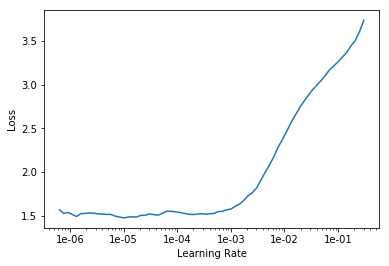

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.448194,1.252006,0.327018
2,1.368747,1.214014,0.317183


In [32]:
learn.save('v1_stage2')